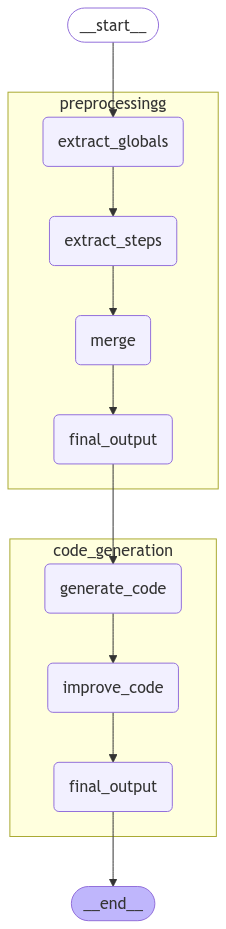

2025-02-24 17:16:59,684 [INFO] Raw scenario loaded successfully.
2025-02-24 17:16:59,709 [INFO] Extracting global variables from the scenario text...
2025-02-24 17:17:01,281 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-02-24 17:17:01,297 [INFO] Extracting test steps from the scenario text...
2025-02-24 17:17:09,039 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-02-24 17:17:09,042 [INFO] Merging global variables and test steps...
2025-02-24 17:17:20,266 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-02-24 17:17:32,492 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-02-24 17:17:38,180 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-02-24 17:17:38,195 [INFO] Graph completed processing.
2025-02-24 17:17:38,197 [INFO] Test code saved to ./output/plaintext_generated_test

Improved Test Code:
 import pytest
import requests
import logging

# Configure logging to show only warnings and errors
logging.basicConfig(level=logging.WARNING)
logger = logging.getLogger(__name__)

# Global variables
BASE_URL = "https://decision-delivery-internal.stage.ideasrms.com"
CLIENT_CODE = "client1234"
PROPERTY_CODE = "property123"

def test_decision_delivery_process():
    """Test the decision delivery process through a series of API calls.

    Steps:
    1. Create a decision delivery request.
    2. Post daily bars.
    3. Update the decision delivery request.
    4. Check the status of the decision delivery request.
    """
    correlation_id = None

    # Step 1: Create a Decision Delivery Request
    try:
        payload = {
            "decisionUploadType": "FULL",
            "decisionType": "Approval",
            "clientEnvironmentUrl": "https://abc.com"
        }
        response = requests.post(
            f"{BASE_URL}/api/v1/decisiondelivery/requests/{CLIENT_COD

In [2]:
#!/usr/bin/env python
# coding: utf-8

import logging
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from typing import TypedDict, Annotated

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")
logger = logging.getLogger(__name__)
load_dotenv()

# Initialize ChatOpenAI
chat_openai = ChatOpenAI(model="gpt-4o-mini", temperature=0.4)

# Define the overall agent state
class AgentState(TypedDict):
    plain_scenarios: Annotated[str, "Raw scenario input"]
    preprocessing_output: Annotated[str, "Refined scenario output"]
    code_generation_output: Annotated[str, "Improved test code output"]
    execution_output: Annotated[str, "Test execution output"]

# Import the compiled subgraphs
from preprocessing_subgraph import build_preprocessing_subgraph
from codegeneration_subgraph import build_code_generation_subgraph

# Build subgraphs
preprocessing_graph = build_preprocessing_subgraph()
code_generation_graph = build_code_generation_subgraph()

# Composite node wrappers
def preprocessing_composite_node(state: AgentState) -> dict:
    result = preprocessing_graph.invoke({"scenario": state["plain_scenarios"]})
    return {"preprocessing_output": result["preprocessing_output"]}

def code_generation_composite_node(state: AgentState) -> dict:
    result = code_generation_graph.invoke({"preprocessing_output": state["preprocessing_output"]})
    return {"code_generation_output": result["code_generation_output"]}

from plaintext_codeexecution import execute_tests
def code_execution_composite_node(state: AgentState) -> dict:
    """
    Executes the generated test code by invoking the execute_tests function
    from the code_execution module and captures its output.
    """
    try:
        logger.info("Executing generated test code via code_execution module.")
        execution_output = execute_tests()
        return {"execution_output": execution_output}
    except Exception as e:
        error_msg = f"Error during test execution: {e}"
        logger.error(error_msg)
        return {"execution_output": error_msg}

# Build the parent graph
parent_builder = StateGraph(AgentState, output=AgentState)
parent_builder.add_node("preprocessing", preprocessing_composite_node)
parent_builder.add_node("code_generation", code_generation_composite_node)
parent_builder.add_node("code_execution", code_execution_composite_node)
parent_builder.add_edge(START, "preprocessing")
parent_builder.add_edge("preprocessing", "code_generation")
parent_builder.add_edge("code_generation", "code_execution")
parent_builder.add_edge("code_execution", END)
agent_graph = parent_builder.compile()

# Visualize the graph
display(Image(agent_graph.get_graph(xray=1).draw_mermaid_png()))


In [ ]:

def run_graph():
    try:
        # Read the raw scenario
        with open("./input/plaintext_scenarios.txt", "r") as f:
            scenario = f.read()
        logger.info("Raw scenario loaded successfully.")

        # Initialize state
        initial_state: AgentState = {"plain_scenarios": scenario}

        # Invoke the graph
        final_state = agent_graph.invoke(initial_state)
        improved_code = final_state["code_generation_output"]
        logger.info("Graph completed processing.")

        # Save the output
        output_file = "./output/plaintext_generated_test_code.py"
        with open(output_file, "w") as f:
            f.write(improved_code)
        logger.info(f"Test code saved to {output_file}")

        # Display the result
        print("Improved Test Code:\n", improved_code)

    except Exception as e:
        logger.error(f"An error occurred: {e}")
        print(f"Error: {e}")

if __name__ == "__main__":
    run_graph()